In [1]:
from simtk import openmm, unit
from simtk.openmm import app
from openmmtools.testsystems import WaterBox
from datetime import datetime
from mcmc_samplers import MCMCSampler
import numpy as np
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
import pickle

# The work per NCMC step

In [2]:
# Setup box of water
size = 25.0*unit.angstrom     # The length of the edges of the water box.
temperature = 300*unit.kelvin
pressure = 1*unit.atmospheres
wbox = WaterBox(box_edge=size,nonbondedMethod=app.PME,cutoff=9*unit.angstrom,ewaldErrorTolerance=1E-5)

## Example on how to calculate work per step to add salt

In [3]:
# Set up sampler class
npert = 10
nprop = 1
steps = 100
delta_chem = +10000   # For never inserting
attempts = 1

timestep = 1.0*unit.femtoseconds
sampler = MCMCSampler(wbox.system, wbox.topology, wbox.positions, temperature=temperature, pressure=pressure,
                      npert=npert, nprop=nprop, propagator='GHMC', ncmc_timestep = timestep, 
                      delta_chem=delta_chem, mdsteps=steps, saltsteps=attempts, platform='CPU')

# Thermalize
equilibration = 100
sampler.gen_config(mdsteps=equilibration)

# Run insertions
N = 10
t0 = time()
sampler.gen_label(saltsteps=N)
print time() - t0

3.61417984962


### Loading data from scratch/calc_work_add.py
Using 200 attempts

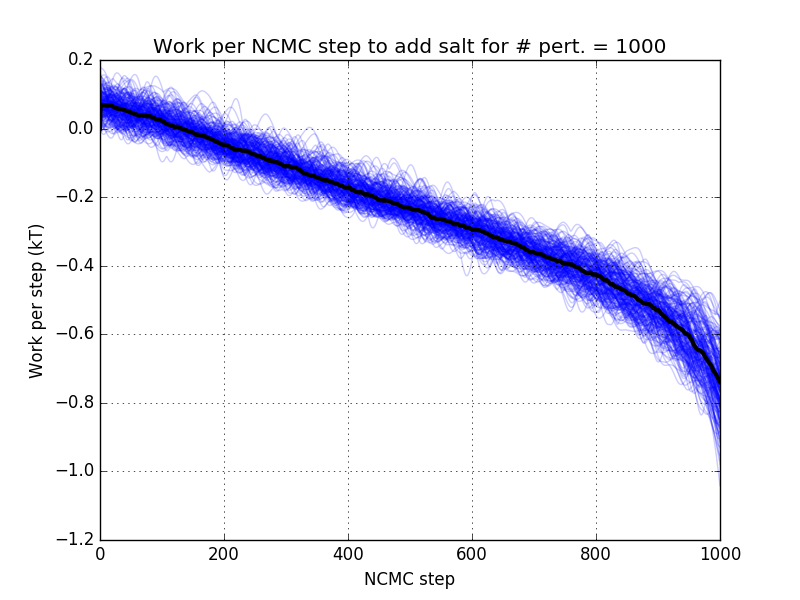

In [11]:
#work_add = pickle.load( open( "work_add.pickle", "rb" ) )
work_add0 = pickle.load(open( "work_add0.pickle", "rb" ))
work_add1 = pickle.load(open( "work_add.pickle", "rb" ))
work_add = work_add0 + work_add1
work_add = np.array(work_add)

median = np.percentile(work_add,50,axis=0)

plt.clf()
for i in range(len(work_add)):
    plt.plot(work_add[i],color='blue', alpha=0.2)

plt.plot(median,lw=3,color='k')
plt.grid()
plt.title('Work per NCMC step to add salt for # pert. = 1000')
plt.xlabel('NCMC step')
plt.ylabel('Work per step (kT)')
plt.savefig('Step_Work_Add.png', format="png")
Image('Step_Work_Add.png')

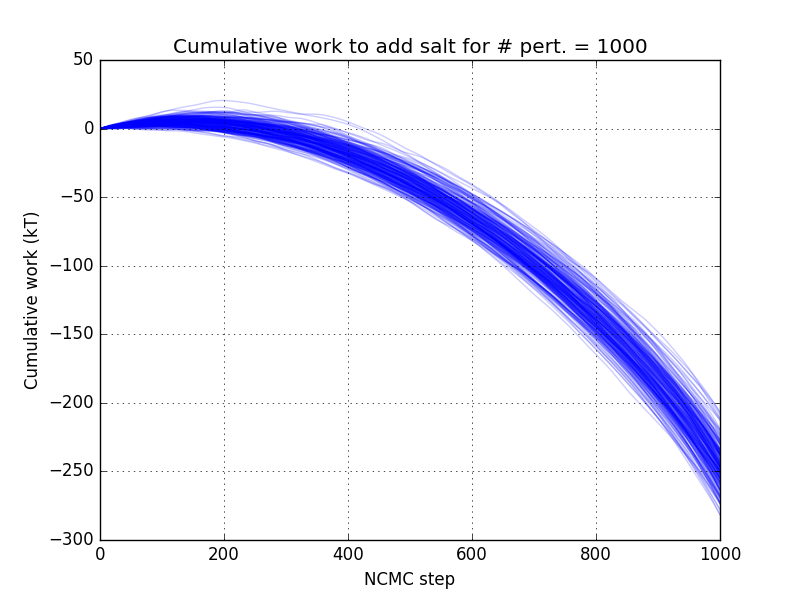

In [14]:
plt.clf()
for i in range(len(work_add)):
    plt.plot(np.cumsum(work_add[i]),color='blue', alpha=0.2)

#plt.plot(median,lw=3,color='k')
plt.grid()
plt.title('Cumulative work to add salt for # pert. = 1000')
plt.xlabel('NCMC step')
plt.ylabel('Cumulative work (kT)')
plt.savefig('Cum_Work_Add.png', format="png")
Image('Cum_Work_Add.png')

### Loading data from scratch/calc_work_rm.py
Using 200 attempts

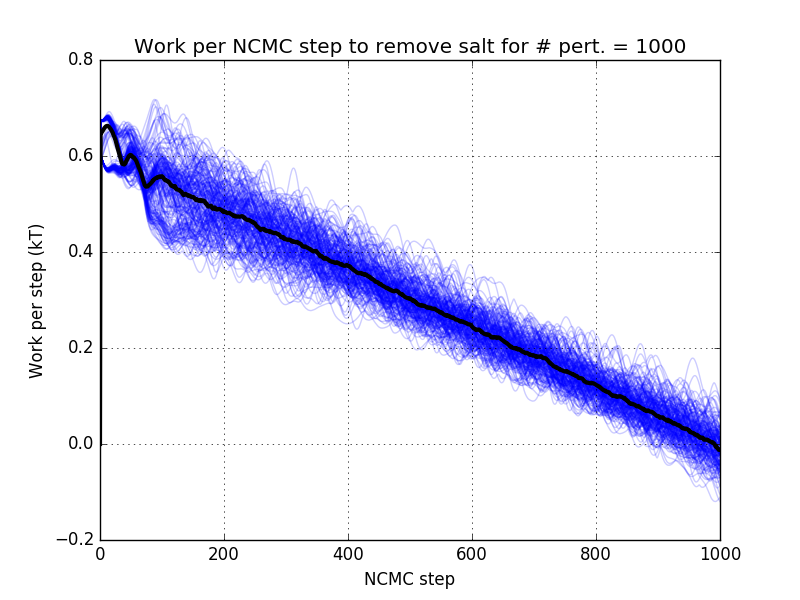

In [9]:
work_rm0 = pickle.load(open( "work_rm0.pickle", "rb" ))
work_rm1 = pickle.load(open( "work_rm.pickle", "rb" ))
work_rm = work_rm0 + work_rm1

work_rm = np.array(work_rm)
median = np.percentile(work_rm,50,axis=0)

plt.clf()
for i in range(len(work_rm)):
    plt.plot(work_rm[i],color='blue', alpha=0.2)

plt.plot(median,lw=3,color='k')
plt.grid()
plt.title('Work per NCMC step to remove salt for # pert. = 1000')
plt.xlabel('NCMC step')
plt.ylabel('Work per step (kT)')
plt.savefig('Step_Work_Rm.png', format="png")
Image('Step_Work_Rm.png')

If work increases linearly as the step progresses, what does that mean?

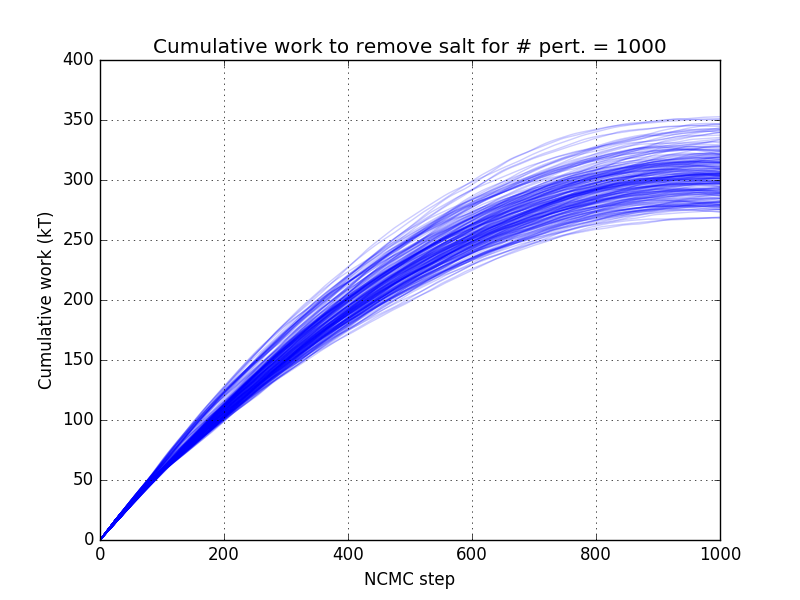

In [15]:
plt.clf()
for i in range(len(work_rm)):
    plt.plot(np.cumsum(work_rm[i]),color='blue', alpha=0.2)

#plt.plot(median,lw=3,color='k')
plt.grid()
plt.title('Cumulative work to remove salt for # pert. = 1000')
plt.xlabel('NCMC step')
plt.ylabel('Cumulative work (kT)')
plt.savefig('Cum_Work_Rm.png', format="png")
Image('Cum_Work_Rm.png')

In [32]:
cumwork = np.cumsum(work_rm,axis=1).mean(axis=0)

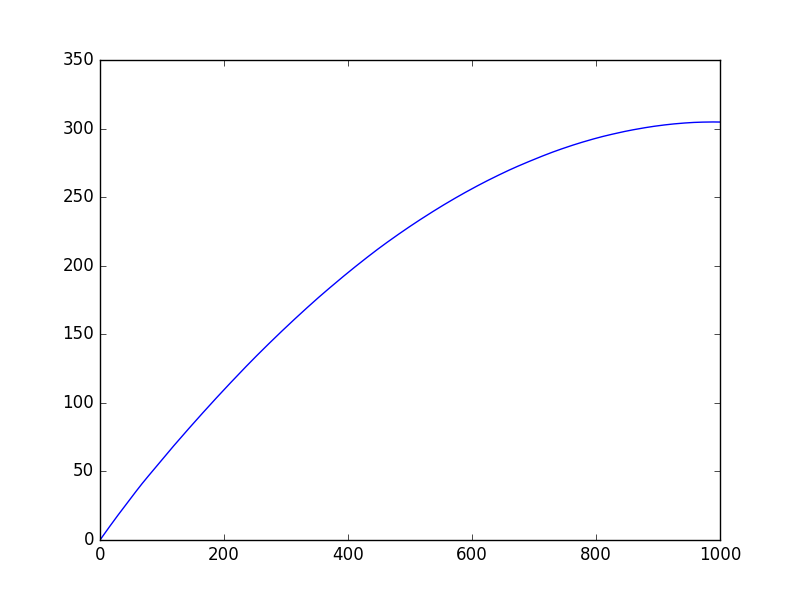

In [33]:
plt.clf()
plt.plot(cumwork)
plt.savefig('temp.png', format="png")
Image('temp.png')